# 1. Import the required libraries

In [300]:
# importing libraries

from keras.callbacks import ModelCheckpoint
from keras.datasets import fashion_mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.metrics
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 2. Data Acquisition


## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [301]:
# Using the Fashion MNIST dataset  of Keras and loading the data

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


# 2.2 Write your observations from the above.

### Observations:

1. Dataset contains total 70000 examples out of which 60000 are in training set and 10000 are in testing set.   


2. Each image is having height of 28 pixels and width of 28 pixels, total 784 pixels. Total there are 785 attributes. A class lable attribute and 784 pixel attributes.


3. Images are classified to a specific class and using this data model can be created to classify new images.


4. Below is the plot to view examples of training data.

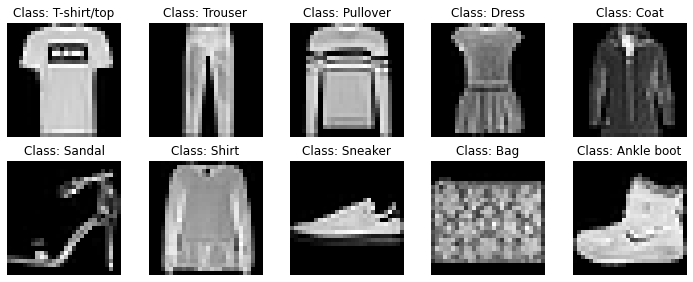

In [302]:
class_labels_dict = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

fig = plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    img = X_train[y_train == i][0]
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("Class: {}".format(class_labels_dict[i]))
    plt.axis('off')

plt.tight_layout()


# 3. Data Preparation



## 3.1 Apply pre-processing techiniques

### Comments:

#### Below mentioned preprocessing techniques are applied:


1. Reshape the input so that each 28x28 image becomes a single 784 dimensional vector. This is required for input to neural network.


2. Normalize inputs so that pixel values are in the [0-1] range rather than [0-255].


3. Perform one-hot encoding to deal with categorical variables in our case. 


In [303]:
# Reshaping of input

X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [304]:
# Normalization of input

X_train /= 255
X_test /= 255

In [305]:
# one-hot encoding of target variable

num_classes = 10 # There are 10 classes possible
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

## 3.2 Identify the target variables.



### Target variables and one-hot encoding :


1. This is already being done in above sections 2.1 and 3.1


## 3.3 Split the data into training set and testing set

1. This is already being done in above section 2.1 above

## 3.4 Preprocessing report



### Preprocessing Justifications :
    
1. Reshaping of input is done so that each 28x28 pixel becomes a 784 dimensional vector which is needed for neural networks.

    
2. Pixel values are normalized as it is better to work with [0-1] range instead of [0-255] range.
    
    
3. The target vectors y_train and y_test are arrays which can take the values 0, 1, 2, 3 etc. This means our  model would assume that predicting 1 instead of 0 is better than predicting 5.But our labels are actually categorical - the value 0 encodes T-shirts/Tops, which are no more similar to Trousers (encoded by 1) than they are to sandals (encoded by 5). To address this, we use one-hot encoding to deal with the categorical target variables in context.

### Size of Training and Testing dataset after pre-processing :

In [306]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


# 4. Deep Neural Network Architecture


## 4.1 Architecture Design - Basic Model - 4 Layers

### Comments :

1. We will be using Sequential model with dense input, hidden and output layers.


2. We will be using Relu activation function for input and hidden layers and Softmax activation function for output layer.


3. We will use dropout to prevent overfitting of training data



In [307]:
t0 = time.time()
model = Sequential() # Declare a Sequential model

#Layer 1
model.add(Dense(512, input_shape=(784,))) # Add a dense input layer of 512 units
                                        # The input shape is (784,) because the features are 784 dimensional vectors
model.add(Activation('relu')) # Apply ReLu activation function to the layer output

#Layer 2
model.add(Dense(512)) # Add 1st hidden layer of 512 units
model.add(Activation('relu'))

#Layer 3
model.add(Dense(384)) # Add 2nd hidden layer of 384 units
model.add(Activation('relu'))

#Layer 4
model.add(Dense(num_classes)) # Add an output layer of 10 units, the number of classes
model.add(Activation('softmax')) # The "softmax" activation ensures the output is a valid probability distribution
t1 = time.time()

total = t1-t0
total

0.07971072196960449

## 4.2 DNN Report

### Report and Justifications as per model summary below :

* Total 4 Layers are in the architecture - Input layer, Two Hidden Layers, Output Layer.


* Layers & Units - Input - 512 units | 1st Hidden Layer - 512 units | 2nd Hidden Layer - 384 units | Outlayer - 10 units (equal to number of classes). 


* Total number of trainable parameters - 865,418


In [308]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 512)               401920    
                                                                 
 activation_128 (Activation)  (None, 512)              0         
                                                                 
 dense_129 (Dense)           (None, 512)               262656    
                                                                 
 activation_129 (Activation)  (None, 512)              0         
                                                                 
 dense_130 (Dense)           (None, 384)               196992    
                                                                 
 activation_130 (Activation)  (None, 384)              0         
                                                                 
 dense_131 (Dense)           (None, 10)              

# 5. Training the model


## 5.1 Configure the training


In [309]:
filepath="mlp-weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

## 5.2 Train the model


In [310]:
## Training the model with cross validation and 25 epochs

## SGD Optimizer used

## CE loss and Accuracy recorded for each epoch


start_time = time.time()
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    batch_size=128,
                    epochs=25,
                    verbose=1,
                    validation_data=(X_test,Y_test))
end_time = time.time()

print('\nTotal time is: ', end_time-start_time)
print('\nFinal training accuracy ', history.history['accuracy'][-1])
print('\nFinal validation accuracy ', history.history['val_accuracy'][-1])

Epoch 1/25
469/469 [==============================] - 9s 18ms/step - loss: 0.6091 - accuracy: 0.7908 - val_loss: 0.4507 - val_accuracy: 0.8409
Epoch 2/25
469/469 [==============================] - 8s 17ms/step - loss: 0.4049 - accuracy: 0.8547 - val_loss: 0.3999 - val_accuracy: 0.8535
Epoch 3/25
469/469 [==============================] - 8s 17ms/step - loss: 0.3625 - accuracy: 0.8701 - val_loss: 0.3915 - val_accuracy: 0.8609
Epoch 4/25
469/469 [==============================] - 8s 17ms/step - loss: 0.3362 - accuracy: 0.8779 - val_loss: 0.4299 - val_accuracy: 0.8472
Epoch 5/25
469/469 [==============================] - 8s 17ms/step - loss: 0.3144 - accuracy: 0.8849 - val_loss: 0.3731 - val_accuracy: 0.8630
Epoch 6/25
469/469 [==============================] - 8s 17ms/step - loss: 0.2976 - accuracy: 0.8907 - val_loss: 0.3718 - val_accuracy: 0.8683
Epoch 7/25
469/469 [==============================] - 8s 17ms/step - loss: 0.2856 - accuracy: 0.8944 - val_loss: 0.3369 - val_accuracy: 0.8765

### Justifications:

1. Stochastic Gradient Descent (SGD) is used due to below reasons
    - Efficient in computation
    - Faster convergance
    - Prevents overfitting
    - Scalable for large datasets
    - Flexible in terms of hyper-parameter tuning
    
    
    
2. Learning rate of 0.01 is taken as we think it is good to start with.
    
    

# 6. Test the model

In [311]:
model_eval = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.3365 - accuracy: 0.8897


# 7. Intermediate result



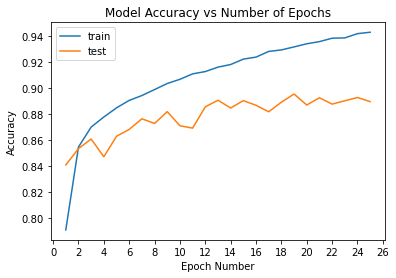

In [312]:
# 1. Training and Validation accuracy history

plt.plot(range(1,1+len(history.history['accuracy'])), history.history['accuracy'])
plt.plot(range(1,1+len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,28,2))
plt.show()

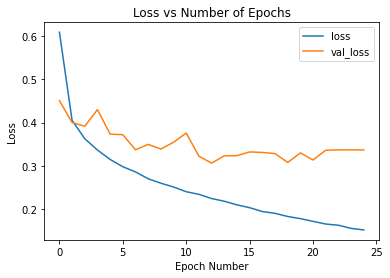

In [313]:
# 2. Plot the training and validation loss history.

plt.title('Loss vs Number of Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch Number')
plt.plot(history.history['loss'], label= 'loss')
plt.plot(history.history['val_loss'], label= 'val_loss')
plt.legend()
plt.show()

In [314]:
# prediction

num_classes = 10

#traget names
target_names = ["Class {}".format(i) for i in range(num_classes)]

Ytrue = np.argmax(Y_test, axis = 1)

# Predict Labels
Ypredicted = model.predict(X_test)
Ypredicted = np.argmax(np.round(Ypredicted), axis = 1)
print (Ytrue.shape)
print (Ypredicted.shape)

313/313 [==============================] - 1s 4ms/step
(10000,)
(10000,)


### Confusion Matrix, Precision, Recall, f1-score

              precision    recall  f1-score   support

           0       0.73      0.86      0.79      1000
           1       0.99      0.98      0.99      1000
           2       0.81      0.83      0.82      1000
           3       0.90      0.90      0.90      1000
           4       0.89      0.71      0.79      1000
           5       0.97      0.97      0.97      1000
           6       0.71      0.74      0.72      1000
           7       0.95      0.95      0.95      1000
           8       0.99      0.95      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



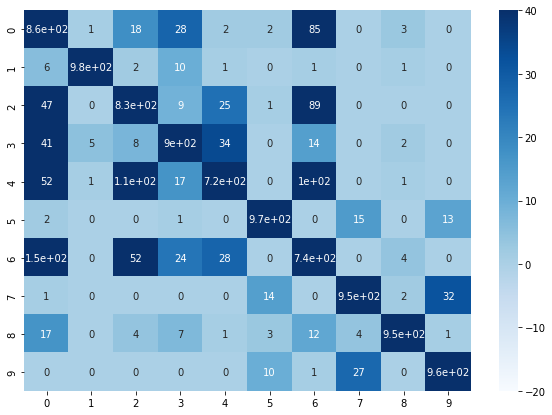

In [315]:
cm = confusion_matrix(Ytrue, Ypredicted)
df_cm = pd.DataFrame(cm)

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, vmin=-20, vmax=40, cmap="Blues")

print(classification_report(Ytrue, Ypredicted))

# 8. Model architecture


# 8.1 Architecture with 3 Layers

In [316]:
## 3 layered model

t0 = time.time()
model_3L = Sequential() # Declare a Sequential model

#Layer 1
model_3L.add(Dense(512, input_shape=(784,))) # Add a dense input layer of 512 units
                                        # The input shape is (784,) because the features are 784 dimensional vectors
model_3L.add(Activation('relu')) # Apply ReLu activation function to the layer output

#Layer 2
model_3L.add(Dense(512)) # Add 1st hidden layer of 512 units
model_3L.add(Activation('relu'))

#Layer 3
model_3L.add(Dense(num_classes)) # Add an output layer of 10 units, the number of classes
model_3L.add(Activation('softmax')) # The "softmax" activation ensures the output is a valid probability distribution
t1 = time.time()

sgd_optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_3L.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

history_3L = model_3L.fit(X_train,
                    Y_train,
                    batch_size=128,
                    epochs=25,
                    verbose=1,
                    validation_data=(X_test,Y_test))

total = t1-t0
total

print('\nFinal training accuracy - 3 Layer model :', history_3L.history['accuracy'][-1])
print('\nFinal validation accuracy - 3 Layer model :', history_3L.history['val_accuracy'][-1])

Epoch 1/25
469/469 [==============================] - 7s 15ms/step - loss: 0.6006 - accuracy: 0.7929 - val_loss: 0.4807 - val_accuracy: 0.8295
Epoch 2/25
469/469 [==============================] - 7s 16ms/step - loss: 0.4163 - accuracy: 0.8535 - val_loss: 0.4398 - val_accuracy: 0.8417
Epoch 3/25
469/469 [==============================] - 8s 16ms/step - loss: 0.3762 - accuracy: 0.8651 - val_loss: 0.4136 - val_accuracy: 0.8470
Epoch 4/25
469/469 [==============================] - 7s 14ms/step - loss: 0.3467 - accuracy: 0.8759 - val_loss: 0.3695 - val_accuracy: 0.8659
Epoch 5/25
469/469 [==============================] - 7s 14ms/step - loss: 0.3260 - accuracy: 0.8829 - val_loss: 0.3702 - val_accuracy: 0.8660
Epoch 6/25
469/469 [==============================] - 7s 14ms/step - loss: 0.3097 - accuracy: 0.8889 - val_loss: 0.3635 - val_accuracy: 0.8670
Epoch 7/25
469/469 [==============================] - 7s 14ms/step - loss: 0.2994 - accuracy: 0.8905 - val_loss: 0.3476 - val_accuracy: 0.8764

In [317]:
model_3L_eval = model_3L.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3349 - accuracy: 0.8899


# 8.2 Architecture with 5 Layers

In [318]:
## 5 layered model


t0 = time.time()
model_5L = Sequential() # Declare a Sequential model

#Layer 1
model_5L.add(Dense(512, input_shape=(784,))) # Add a dense input layer of 512 units
                                        # The input shape is (784,) because the features are 784 dimensional vectors
model_5L.add(Activation('relu')) # Apply ReLu activation function to the layer output

#Layer 2
model_5L.add(Dense(512)) # Add 1st hidden layer of 512 units
model_5L.add(Activation('relu'))

#Layer 3
model_5L.add(Dense(384)) # Add 2nd hidden layer of 384 units
model_5L.add(Activation('relu'))

#Layer 4
model_5L.add(Dense(288)) # Add 3rd hidden layer of 288 units
model_5L.add(Activation('relu'))

#Layer 5
model_5L.add(Dense(num_classes)) # Add an output layer of 10 units, the number of classes
model_5L.add(Activation('softmax')) # The "softmax" activation ensures the output is a valid probability distribution
t1 = time.time()

sgd_optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_5L.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

history_5L = model_5L.fit(X_train,
                    Y_train,
                    batch_size=128,
                    epochs=25,
                    verbose=1,
                    validation_data=(X_test,Y_test))

total = t1-t0
total

print('\nFinal training accuracy - 5 Layer model ', history_5L.history['accuracy'][-1])
print('\nFinal validation accuracy - 5 Layer model ', history_5L.history['val_accuracy'][-1])

Epoch 1/25
469/469 [==============================] - 10s 20ms/step - loss: 0.6232 - accuracy: 0.7836 - val_loss: 0.4807 - val_accuracy: 0.8261
Epoch 2/25
469/469 [==============================] - 9s 20ms/step - loss: 0.4007 - accuracy: 0.8546 - val_loss: 0.4056 - val_accuracy: 0.8527
Epoch 3/25
469/469 [==============================] - 10s 21ms/step - loss: 0.3529 - accuracy: 0.8706 - val_loss: 0.3681 - val_accuracy: 0.8676
Epoch 4/25
469/469 [==============================] - 9s 20ms/step - loss: 0.3278 - accuracy: 0.8797 - val_loss: 0.3586 - val_accuracy: 0.8690
Epoch 5/25
469/469 [==============================] - 9s 20ms/step - loss: 0.3053 - accuracy: 0.8881 - val_loss: 0.3523 - val_accuracy: 0.8723
Epoch 6/25
469/469 [==============================] - 9s 20ms/step - loss: 0.2890 - accuracy: 0.8929 - val_loss: 0.3464 - val_accuracy: 0.8756
Epoch 7/25
469/469 [==============================] - 10s 21ms/step - loss: 0.2736 - accuracy: 0.8975 - val_loss: 0.3338 - val_accuracy: 0.8

In [319]:
model_5L_eval = model_5L.evaluate(X_test, Y_test)
print(model_5L_eval)

313/313 [==============================] - 2s 6ms/step - loss: 0.3278 - accuracy: 0.8952
[0.327836275100708, 0.8952000141143799]


### Plotting training and validation accuracy for model architectures comparison

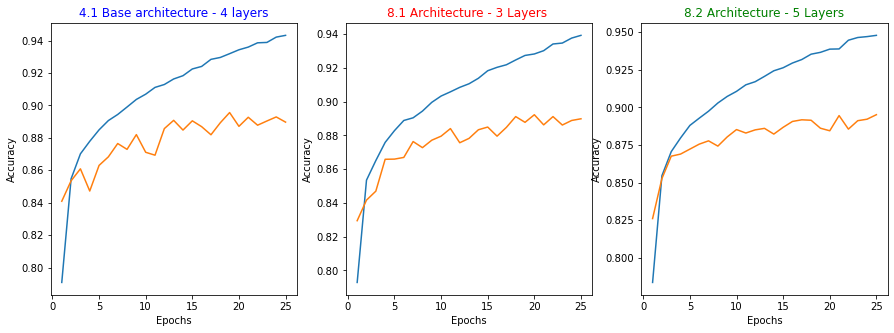

In [320]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

sns.lineplot(x=range(1,1+len(history.history['accuracy'])), y=history.history['accuracy'], ax=axs[0])
sns.lineplot(x=range(1,1+len(history.history['val_accuracy'])), y=history.history['val_accuracy'], ax=axs[0])
axs[0].set_title("4.1 Base architecture - 4 layers", color='blue')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')

sns.lineplot(x=range(1,1+len(history_3L.history['accuracy'])), y=history_3L.history['accuracy'], ax=axs[1])
sns.lineplot(x=range(1,1+len(history_3L.history['val_accuracy'])), y=history_3L.history['val_accuracy'], ax=axs[1])
axs[1].set_title("8.1 Architecture - 3 Layers ", color='red')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')

sns.lineplot(x=range(1,1+len(history_5L.history['accuracy'])), y=history_5L.history['accuracy'], ax=axs[2])
sns.lineplot(x=range(1,1+len(history_5L.history['val_accuracy'])), y=history_5L.history['val_accuracy'], ax=axs[2])
axs[2].set_title("8.2 Architecture - 5 Layers", color='green')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Accuracy')

plt.show()

# 9. Regularisations


# 9.1 : Architecture with dropout of ratio 0.25

### Basic Model changed with dropout of ratio 0.25 applied to input and hidden layers

In [321]:
t0 = time.time()
model_droppped = Sequential() # Declare a Sequential model

#Layer 1
model_droppped.add(Dense(512, input_shape=(784,))) # Add a dense input layer of 512 units
                                        # The input shape is (784,) because the features are 784 dimensional vectors
model_droppped.add(Activation('relu')) # Apply ReLu activation function to the layer output
model_droppped.add(Dropout(0.25)) # Dropout helps prevent the model from overfitting on the training data

#Layer 2
model_droppped.add(Dense(512)) # Add 1st hidden layer of 512 units
model_droppped.add(Activation('relu'))
model.add(Dropout(0.25)) # Dropout added

#Layer 3
model_droppped.add(Dense(384)) # Add 2nd hidden layer of 384 units
model_droppped.add(Activation('relu'))
model.add(Dropout(0.25))  # Dropout added

#Layer 4
model_droppped.add(Dense(num_classes)) # Add an output layer of 10 units, the number of classes
model_droppped.add(Activation('softmax')) # The "softmax" activation ensures the output is a valid probability distribution
t1 = time.time()

total = t1-t0
total

sgd_optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model_droppped.compile(loss='categorical_crossentropy', optimizer= sgd_optimizer, metrics=['accuracy'])

t0 = time.time()
history_dropped = model_droppped.fit(X_train,
                    Y_train,
                    batch_size=128,
                    epochs=25,
                    verbose=1,
                    validation_data=(X_test,Y_test))


t1 = time.time()


total = t1-t0
total

Epoch 1/25
469/469 [==============================] - 10s 20ms/step - loss: 0.6518 - accuracy: 0.7712 - val_loss: 0.4613 - val_accuracy: 0.8361
Epoch 2/25
469/469 [==============================] - 9s 19ms/step - loss: 0.4326 - accuracy: 0.8461 - val_loss: 0.4159 - val_accuracy: 0.8508
Epoch 3/25
469/469 [==============================] - 10s 22ms/step - loss: 0.3836 - accuracy: 0.8602 - val_loss: 0.3987 - val_accuracy: 0.8549
Epoch 4/25
469/469 [==============================] - 11s 24ms/step - loss: 0.3608 - accuracy: 0.8692 - val_loss: 0.3954 - val_accuracy: 0.8566
Epoch 5/25
469/469 [==============================] - 9s 19ms/step - loss: 0.3396 - accuracy: 0.8751 - val_loss: 0.3659 - val_accuracy: 0.8664
Epoch 6/25
469/469 [==============================] - 10s 22ms/step - loss: 0.3278 - accuracy: 0.8791 - val_loss: 0.3558 - val_accuracy: 0.8689
Epoch 7/25
469/469 [==============================] - 9s 20ms/step - loss: 0.3113 - accuracy: 0.8850 - val_loss: 0.3718 - val_accuracy: 0.

244.43420028686523

In [322]:
dropped_eval = model_droppped.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.3084 - accuracy: 0.8964


# 9.2 : Architecture with dropout of ratio 0.25 & L2 regulariser with factor 1e−04.

### Basic Model changed with dropout of ratio 0.25 applied to input and hidden layers and L2 regulariser with factor 1e−04 applied to hidden layers

In [323]:
# Dropped L2

t0 = time.time()
model_droppped_l2 = Sequential() # Declare a Sequential model

#Layer 1
model_droppped_l2.add(Dense(512, input_shape=(784,))) # Add a dense input layer of 512 units
                                        # The input shape is (784,) because the features are 784 dimensional vectors
model_droppped_l2.add(Activation('relu')) # Apply ReLu activation function to the layer output
model_droppped_l2.add(Dropout(0.25)) # Dropout helps prevent the model from overfitting on the training data

#Layer 2
model_droppped_l2.add(Dense(512,kernel_regularizer=keras.regularizers.l2(1e-04))) # Regularizer added
model_droppped_l2.add(Activation('relu'))
model_droppped_l2.add(Dropout(0.25)) # Dropout added

#Layer 3
model_droppped_l2.add(Dense(384,kernel_regularizer=keras.regularizers.l2(1e-04))) # Regularizer added
model_droppped_l2.add(Activation('relu'))
model_droppped_l2.add(Dropout(0.25))  # Dropout added

#Layer 4
model_droppped_l2.add(Dense(num_classes)) # Add an output layer of 10 units, the number of classes
model_droppped_l2.add(Activation('softmax')) # The "softmax" activation ensures the output is a valid probability distribution
t1 = time.time()

total = t1-t0
total


sgd_optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model_droppped_l2.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

t0 = time.time()
history_dropped_l2 = model_droppped_l2.fit(X_train,
                    Y_train,
                    batch_size=128,
                    epochs=25,
                    verbose=1,
                    validation_data=(X_test,Y_test))


t1 = time.time()


total = t1-t0
total


Epoch 1/25
469/469 [==============================] - 11s 23ms/step - loss: 0.8060 - accuracy: 0.7487 - val_loss: 0.5706 - val_accuracy: 0.8249
Epoch 2/25
469/469 [==============================] - 11s 23ms/step - loss: 0.5528 - accuracy: 0.8376 - val_loss: 0.5346 - val_accuracy: 0.8371
Epoch 3/25
469/469 [==============================] - 10s 22ms/step - loss: 0.5053 - accuracy: 0.8509 - val_loss: 0.4858 - val_accuracy: 0.8539
Epoch 4/25
469/469 [==============================] - 10s 22ms/step - loss: 0.4772 - accuracy: 0.8618 - val_loss: 0.4752 - val_accuracy: 0.8610
Epoch 5/25
469/469 [==============================] - 11s 23ms/step - loss: 0.4541 - accuracy: 0.8695 - val_loss: 0.4602 - val_accuracy: 0.8653
Epoch 6/25
469/469 [==============================] - 11s 22ms/step - loss: 0.4371 - accuracy: 0.8739 - val_loss: 0.4457 - val_accuracy: 0.8715
Epoch 7/25
469/469 [==============================] - 10s 22ms/step - loss: 0.4238 - accuracy: 0.8776 - val_loss: 0.4510 - val_accuracy:

273.0602946281433

In [324]:
dropped_l2_eval = model_droppped_l2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.3864 - accuracy: 0.8902


### Plotting training and validation accuracy for model architectures comparison

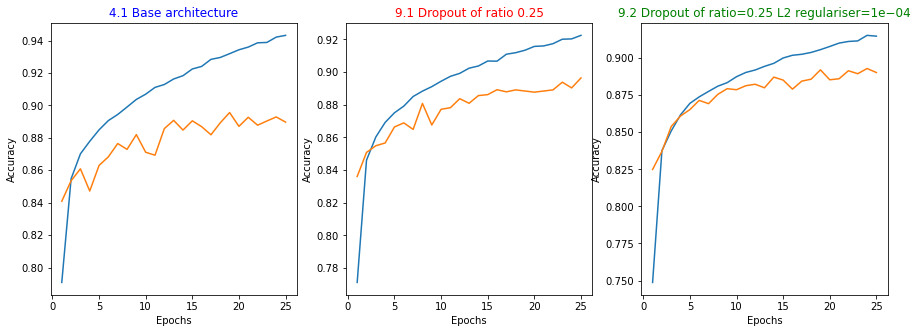

In [326]:
import matplotlib.pyplot as plt
import seaborn as sns

# fig, axs = plt.subplots(ncols=3)
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

sns.lineplot(x=range(1,1+len(history.history['accuracy'])), y=history.history['accuracy'], ax=axs[0])
sns.lineplot(x=range(1,1+len(history.history['val_accuracy'])), y=history.history['val_accuracy'], ax=axs[0])
axs[0].set_title("4.1 Base architecture", color='blue')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')

sns.lineplot(x=range(1,1+len(history_dropped.history['accuracy'])), y=history_dropped.history['accuracy'], ax=axs[1])
sns.lineplot(x=range(1,1+len(history_dropped.history['val_accuracy'])), y=history_dropped.history['val_accuracy'], ax=axs[1])
axs[1].set_title("9.1 Dropout of ratio 0.25", color='red')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')

sns.lineplot(x=range(1,1+len(history_dropped_l2.history['accuracy'])), y=history_dropped_l2.history['accuracy'], ax=axs[2])
sns.lineplot(x=range(1,1+len(history_dropped_l2.history['val_accuracy'])), y=history_dropped_l2.history['val_accuracy'], ax=axs[2])
axs[2].set_title("9.2 Dropout of ratio=0.25 L2 regulariser=1e−04", color='green')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Accuracy')

plt.show()

# 10. Optimisers

## 10.1 : RMSProp optimizer

### Basic Model changed to have optimizer as RMSProp

In [338]:
model_rms = Sequential() # Declare a Sequential model

#Layer 1
model_rms.add(Dense(512, input_shape=(784,))) # Add a dense input layer of 512 units
                                        # The input shape is (784,) because the features are 784 dimensional vectors
model_rms.add(Activation('relu')) # Apply ReLu activation function to the layer output

#Layer 2
model_rms.add(Dense(512)) # Add 1st hidden layer of 512 units
model_rms.add(Activation('relu'))


#Layer 3
model_rms.add(Dense(384)) # Add 2nd hidden layer of 384 units
model_rms.add(Activation('relu'))


#Layer 4
model_rms.add(Dense(num_classes)) # Add an output layer of 10 units, the number of classes
model_rms.add(Activation('softmax')) # The "softmax" activation ensures the output is a valid probability distribution
t1 = time.time()

rms_optimizer = keras.optimizers.RMSprop(learning_rate=0.01)

model_rms.compile(loss='categorical_crossentropy', optimizer=rms_optimizer, metrics=['accuracy'])

history_rms = model_rms.fit(X_train,
                    Y_train,
                    batch_size=128,
                    epochs=25,
                    verbose=1,
                    validation_data=(X_test,Y_test))

Epoch 1/25
469/469 [==============================] - 13s 25ms/step - loss: 1.5239 - accuracy: 0.7121 - val_loss: 0.5222 - val_accuracy: 0.8143
Epoch 2/25
469/469 [==============================] - 11s 24ms/step - loss: 0.5101 - accuracy: 0.8179 - val_loss: 0.4885 - val_accuracy: 0.8368
Epoch 3/25
469/469 [==============================] - 11s 24ms/step - loss: 0.4661 - accuracy: 0.8355 - val_loss: 0.5946 - val_accuracy: 0.7960
Epoch 4/25
469/469 [==============================] - 11s 23ms/step - loss: 0.4411 - accuracy: 0.8457 - val_loss: 0.5093 - val_accuracy: 0.8288
Epoch 5/25
469/469 [==============================] - 11s 23ms/step - loss: 0.4295 - accuracy: 0.8527 - val_loss: 0.4378 - val_accuracy: 0.8526
Epoch 6/25
469/469 [==============================] - 11s 23ms/step - loss: 0.4149 - accuracy: 0.8542 - val_loss: 0.4752 - val_accuracy: 0.8425
Epoch 7/25
469/469 [==============================] - 11s 23ms/step - loss: 0.4087 - accuracy: 0.8587 - val_loss: 0.5023 - val_accuracy:

In [339]:
rms_eval = model_rms.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.6233 - accuracy: 0.8477


## 10.2 :  Adam optimizer

### Basic Model changed to have optimizer as Adam

In [340]:
model_adam = Sequential() # Declare a Sequential model

#Layer 1
model_adam.add(Dense(512, input_shape=(784,))) # Add a dense input layer of 512 units
                                        # The input shape is (784,) because the features are 784 dimensional vectors
model_adam.add(Activation('relu')) # Apply ReLu activation function to the layer output

#Layer 2
model_adam.add(Dense(512)) # Add 1st hidden layer of 512 units
model_adam.add(Activation('relu'))


#Layer 3
model_adam.add(Dense(384)) # Add 2nd hidden layer of 384 units
model_adam.add(Activation('relu'))


#Layer 4
model_adam.add(Dense(num_classes)) # Add an output layer of 10 units, the number of classes
model_adam.add(Activation('softmax')) # The "softmax" activation ensures the output is a valid probability distribution
t1 = time.time()


adam_optimizer = keras.optimizers.Adam(
    learning_rate=0.001,  # Learning rate
    beta_1=0.9,  # Exponential decay rate for the first moment estimates
    beta_2=0.999,  # Exponential decay rate for the second moment estimates
    epsilon=1e-07,  # Small value to prevent division by zero
    amsgrad=False  # Whether to apply AMSGrad variant of Adam optimizer
)
model_adam.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(X_train,
                    Y_train,
                    batch_size=128,
                    epochs=25,
                    verbose=1,
                    validation_data=(X_test,Y_test))

adam_eval = model_adam.evaluate(X_test, Y_test)

Epoch 1/25
469/469 [==============================] - 15s 29ms/step - loss: 0.4736 - accuracy: 0.8293 - val_loss: 0.4440 - val_accuracy: 0.8421
Epoch 2/25
469/469 [==============================] - 13s 28ms/step - loss: 0.3532 - accuracy: 0.8715 - val_loss: 0.3673 - val_accuracy: 0.8663
Epoch 3/25
469/469 [==============================] - 14s 29ms/step - loss: 0.3174 - accuracy: 0.8822 - val_loss: 0.3518 - val_accuracy: 0.8729
Epoch 4/25
469/469 [==============================] - 15s 33ms/step - loss: 0.2941 - accuracy: 0.8905 - val_loss: 0.3586 - val_accuracy: 0.8712
Epoch 5/25
469/469 [==============================] - 14s 31ms/step - loss: 0.2745 - accuracy: 0.8976 - val_loss: 0.3631 - val_accuracy: 0.8681
Epoch 6/25
469/469 [==============================] - 14s 30ms/step - loss: 0.2603 - accuracy: 0.9010 - val_loss: 0.3278 - val_accuracy: 0.8816
Epoch 7/25
469/469 [==============================] - 13s 29ms/step - loss: 0.2455 - accuracy: 0.9072 - val_loss: 0.3294 - val_accuracy:

In [341]:
### Plotting training and validation accuracy for model architectures comparison

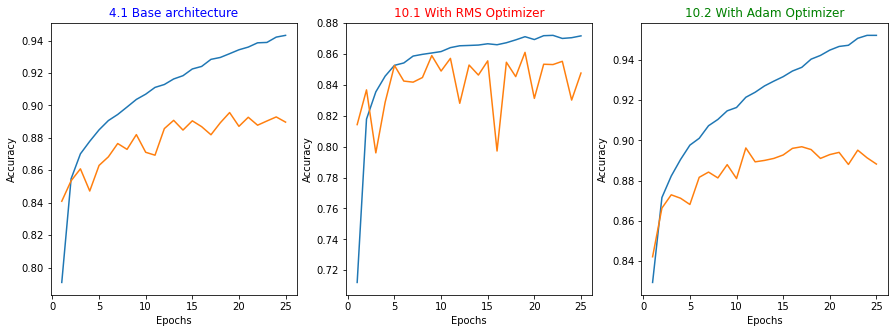

In [342]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

sns.lineplot(x=range(1,1+len(history.history['accuracy'])), y=history.history['accuracy'], ax=axs[0])
sns.lineplot(x=range(1,1+len(history.history['val_accuracy'])), y=history.history['val_accuracy'], ax=axs[0])
axs[0].set_title("4.1 Base architecture", color='blue')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')

sns.lineplot(x=range(1,1+len(history_rms.history['accuracy'])), y=history_rms.history['accuracy'], ax=axs[1])
sns.lineplot(x=range(1,1+len(history_rms.history['val_accuracy'])), y=history_rms.history['val_accuracy'], ax=axs[1])
axs[1].set_title("10.1 With RMS Optimizer", color='red')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')

sns.lineplot(x=range(1,1+len(history_adam.history['accuracy'])), y=history_adam.history['accuracy'], ax=axs[2])
sns.lineplot(x=range(1,1+len(history_adam.history['val_accuracy'])), y=history_adam.history['val_accuracy'], ax=axs[2])
axs[2].set_title("10.2 With Adam Optimizer", color='green')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Accuracy')


plt.show()

# 11. Conclusion

In [343]:
data = [model_eval[1], model_3L_eval[1], model_5L_eval[1], dropped_eval[1], dropped_l2_eval[1], rms_eval[1],adam_eval[1]]

print('\n Evaluation Accuracy - Basic Model : ', data[0])
print('\n Evaluation Accuracy - 3 Layer Model : ', data[1])
print('\n Evaluation Accuracy - 5 Layer Model : ', data[2])
print('\n Evaluation Accuracy - Dropout included : ', data[3])
print('\n Evaluation Accuracy - Dropout & L2 Regularization included: ', data[4])
print('\n Evaluation Accuracy - RMSProp optimizer: ', data[5])
print('\n Evaluation Accuracy - Adam optimizer: ', data[6])



 Evaluation Accuracy - Basic Model :  0.8896999955177307

 Evaluation Accuracy - 3 Layer Model :  0.8899000287055969

 Evaluation Accuracy - 5 Layer Model :  0.8952000141143799

 Evaluation Accuracy - Dropout included :  0.896399974822998

 Evaluation Accuracy - Dropout & L2 Regularization included:  0.8902000188827515

 Evaluation Accuracy - RMSProp optimizer:  0.8476999998092651

 Evaluation Accuracy - Adam optimizer:  0.8881999850273132


## Below are the conclusions : 

1. Increasing hidden layers to the basic model improved the acccuracy of the model. 5 layer model perrformed the best.


2. Adding dropout to basic model improved the accuracy, which was expected as dropout prevents overfitting.


3. Adding L2 Regularization in addition to dropout did not had much impact on performance of the model.


4. RMSprop and Adam optimizers when used in the basic model resulted into lower performance then SGD optimizer.


5. Overall, we think 5 or more layer model with dropout included could be deliver best performance!


Thank You!!!
